## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

## Concatenate

In [2]:
# Specify the paths to your two Gzipped CSV files
year2000 = "Data/final_tmdb_data_2000.csv.gz"
year2001 = "Data/final_tmdb_data_2001.csv.gz"

# Read the data from both files into pandas DataFrames
df1 = pd.read_csv(year2000, compression="gzip")
df2 = pd.read_csv(year2001, compression="gzip")

# Concatenate the two DataFrames vertically (along the rows)
result_df = pd.concat([df1, df2], ignore_index=True)

# Specify the path for the output concatenated CSV file
output_csv_path = "Data/tmdb_results_combined.csv"

# Save the concatenated DataFrame to a new CSV file
result_df.to_csv(output_csv_path, index=False)

In [5]:
result_df.head()
result_df.tail()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2618,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,Underground French necrophilia nastiness,0.600,/75kV4BpVnXe2kAMsWAKxx466M88.jpg,"[{'id': 139554, 'logo_path': None, 'name': 'Am...","[{'iso_3166_1': 'FR', 'name': 'France'}]",2001-01-01,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,NaN
2619,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,In the 1880's a ruthess gang of outlaws terroi...,0.600,NaN,"[{'id': 68934, 'logo_path': None, 'name': 'Ske...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-10-10,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,NaN
2620,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,Derek gets sucked into a gothic cult that turn...,0.600,/goddglRmgDgQuo9tlMdoeeHlRfX.jpg,"[{'id': 133614, 'logo_path': None, 'name': 'Wo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2001-01-01,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR
2621,tt9071078,0.0,/51274Q2vnmajonyiqq3YNQQ7q4I.jpg,NaN,127389.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",https://movie.douban.com/subject/26420865/,1044371.0,zh,魔忍狂刀,"A crucial government paper, a revenge motive, ...",2.319,/gEsjUNdhydx6l8Za6Z8c7qeOj0V.jpg,"[{'id': 13958, 'logo_path': '/yblRwoxf2sGIzzWV...",[],2001-02-01,0.0,100.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,Dragon Hero,Dragon Hero,0.0,0.0,0.0,NaN
2622,tt9212730,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,382630.0,ja,実録外伝 ゾンビ極道,Yakuza Zombie opens with an introduction to a ...,1.702,/2UxCpo1R2IcCF7c8KkZDvt81JbS.jpg,"[{'id': 73158, 'logo_path': None, 'name': 'Jap...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-02-15,0.0,88.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Yakuza Zombie,0.0,0.0,0.0,NaN


## EDA - Visualizations

In [19]:
# Filter the DataFrame to include only movies with non-zero budget or revenue
valid_financial_info = result_df[(result_df['budget'] > 0) | (result_df['revenue'] > 0)]

# Count the number of movies with valid financial information
num_movies_with_valid_info = len(valid_financial_info)

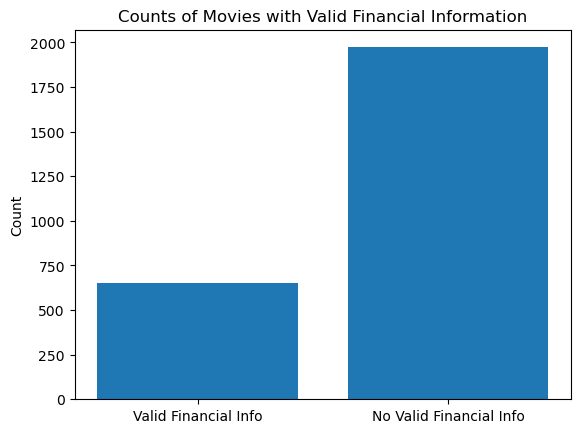

In [20]:
# Data
categories = ['Valid Financial Info', 'No Valid Financial Info']
counts = [num_movies_with_valid_info, len(result_df) - num_movies_with_valid_info]

# Create a bar graph
plt.bar(categories, counts)
plt.title('Counts of Movies with Valid Financial Information')
plt.ylabel('Count')
plt.show()

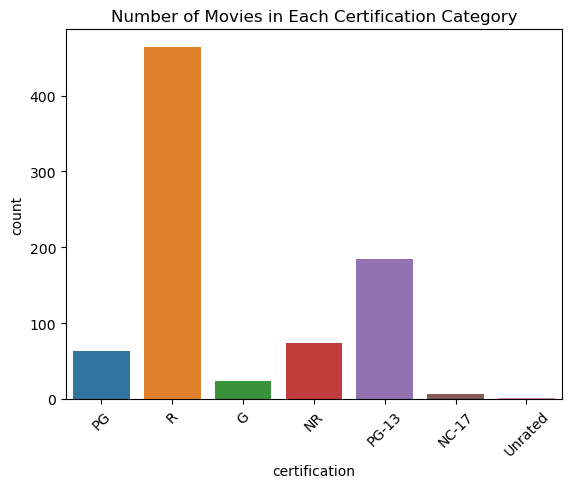

In [21]:
# Create a countplot to visualize the number of movies in each certification category
sns.countplot(data=result_df, x="certification")
plt.title('Number of Movies in Each Certification Category')
plt.xticks(rotation=45)
plt.show()

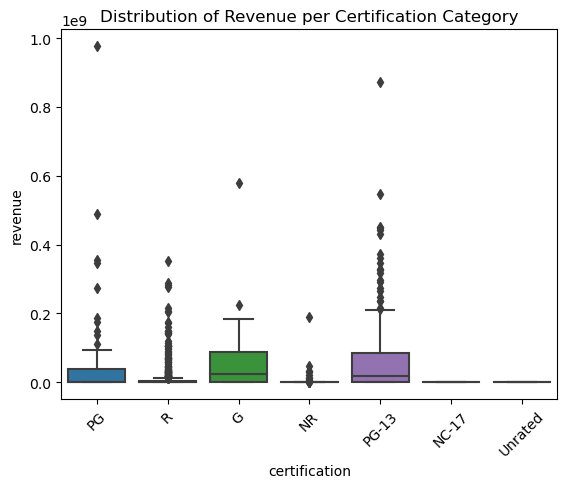

In [22]:
# Create a box plot to visualize the distribution of revenue per certification category
sns.boxplot(data=result_df, x='certification', y='revenue')
plt.title('Distribution of Revenue per Certification Category')
plt.xticks(rotation=45)
plt.show();

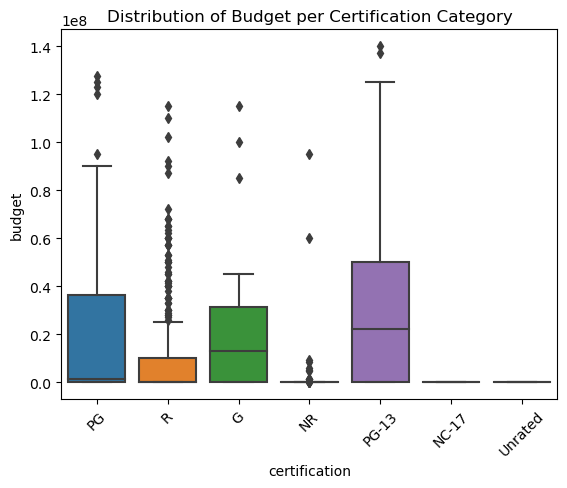

In [23]:
# Create a box plot to visualize the distribution of revenue per certification category
sns.boxplot(data=result_df, x='certification', y='budget')
plt.title('Distribution of Budget per Certification Category')
plt.xticks(rotation=45)
plt.show();